In [28]:
# Paso 1 - Carga del Conjunto de Datos
#!pip install scikit-learn matplotlib
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
df = pd.read_csv("PorcentajeOro7_3.csv", encoding="latin-1")

In [17]:
# Paso 2 - Visualización de una Muestra
df.head()

,ID_MUESTRA,FECHA_MUESTRA,CONTROL_CALIDAD,Porcentaje Au,Porcentaje As,Porcentaje Zn,ID_SECTOR,este,norte,origenCoordenadas,sistemaCoordenadas,provenienciaMuestra
0,1,2022-05-26,ORIGINAL,0.34,0.89,0.17,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
1,2,2022-05-25,ORIGINAL,0.66,0.30,0.97,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
2,3,2022-05-23,ORIGINAL,0.19,0.43,0.75,Libano,894237.0,1042563,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
3,4,2022-05-27,ORIGINAL,0.08,0.46,1.22,Libano,894323.0,1042890,Bogota [Bogota],Datum Magna,Frente de Mina
4,5,2022-05-24,ORIGINAL,0.49,1.05,2.04,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Frente de Mina


In [18]:
# Paso 3 - Normalización de los Datos:

print(df.columns)  # Print the actual column names in the DataFrame

# Adjust the column names in the list if necessary
columnas_a_normalizar = ['ID_MUESTRA', 'FECHA_MUESTRA', 'CONTROL_CALIDAD', 'Porcentaje Au',	'Porcentaje As', 'Porcentaje Zn', 'ID_SECTOR',	'este',	'norte', 'origenCoordenadas', 'sistemaCoordenadas', 'provenienciaMuestra']

datos_a_normalizar = df[columnas_a_normalizar]
df.head()
datos_a_normalizar.head()



Index(['ID_MUESTRA', 'FECHA_MUESTRA', 'CONTROL_CALIDAD', 'Porcentaje Au',
       'Porcentaje As', 'Porcentaje Zn', 'ID_SECTOR', 'este', 'norte',
       'origenCoordenadas', 'sistemaCoordenadas', 'provenienciaMuestra'],
      dtype='object')


,ID_MUESTRA,FECHA_MUESTRA,CONTROL_CALIDAD,Porcentaje Au,Porcentaje As,Porcentaje Zn,ID_SECTOR,este,norte,origenCoordenadas,sistemaCoordenadas,provenienciaMuestra
0,1,2022-05-26,ORIGINAL,0.34,0.89,0.17,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
1,2,2022-05-25,ORIGINAL,0.66,0.30,0.97,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
2,3,2022-05-23,ORIGINAL,0.19,0.43,0.75,Libano,894237.0,1042563,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
3,4,2022-05-27,ORIGINAL,0.08,0.46,1.22,Libano,894323.0,1042890,Bogota [Bogota],Datum Magna,Frente de Mina
4,5,2022-05-24,ORIGINAL,0.49,1.05,2.04,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Frente de Mina


In [30]:
# Entrenar el modelo
# df['Porcentaje Au'] = df['Porcentaje Au'].apply(lambda x: min(max(0, x - 1), 4)) # Change 9 to 4

# Select all columns except 'Porcentaje AU' for training
X = df.drop('Porcentaje Au', axis=1)

# Identify columns with non-numeric values
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col], errors='raise')
        except ValueError:
            print(f"Column '{col}' contains non-numeric values.")
            # Handle non-numeric columns (e.g., one-hot encoding)
            X = pd.get_dummies(X, columns=[col]) # Use get_dummies for one-hot encoding

# Convert all columns in X to float32
X = X.astype('float32')

# Adjust the input shape of the first layer to match the new shape of X
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1],)),  # Changed input shape back to (10,)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Calculate class weights based on the target variable 'Porcentaje Au'
class_weights = compute_class_weight('balanced', classes=np.unique(df['Porcentaje Au']), y=df['Porcentaje Au']) # Use df['Porcentaje Au'] for y
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Entrenar el modelo
history = model.fit(X, df['Porcentaje Au'], epochs=10, class_weight=class_weights_dict)

Column 'FECHA_MUESTRA' contains non-numeric values.
Column 'CONTROL_CALIDAD' contains non-numeric values.
Column 'ID_SECTOR' contains non-numeric values.
Column 'norte' contains non-numeric values.
Column 'origenCoordenadas' contains non-numeric values.
Column 'sistemaCoordenadas' contains non-numeric values.
Column 'provenienciaMuestra' contains non-numeric values.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5935 - loss: 15122.4590
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00


<Axes: >

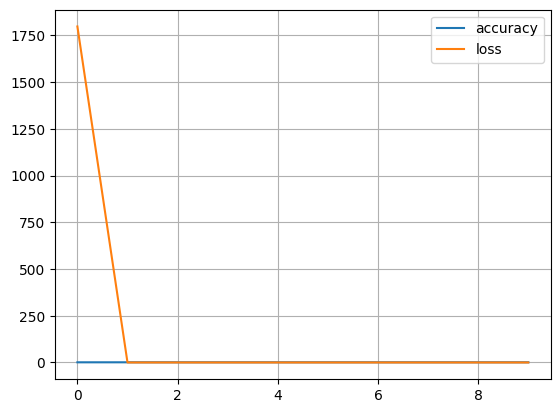

In [25]:
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

In [26]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(X, df['Porcentaje Au'])
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

# Historico 1
# loss: 0.20955325663089752
# accuracy: 0.929648220539093
# Historico 2
# loss: 0.21761275827884674
# accuracy: 0.9346733689308167
# Historico 2
# loss: 0.10347310453653336
# accuracy: 0.9698492288589478
# Historico 2
# loss: 0.0028835523407906294
# accuracy: 1.0

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00  
loss: 0.0
accuracy: 1.0


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857

    accuracy                           1.00       857
   macro avg       1.00      1.00      1.00       857
weighted avg       1.00      1.00      1.00       857



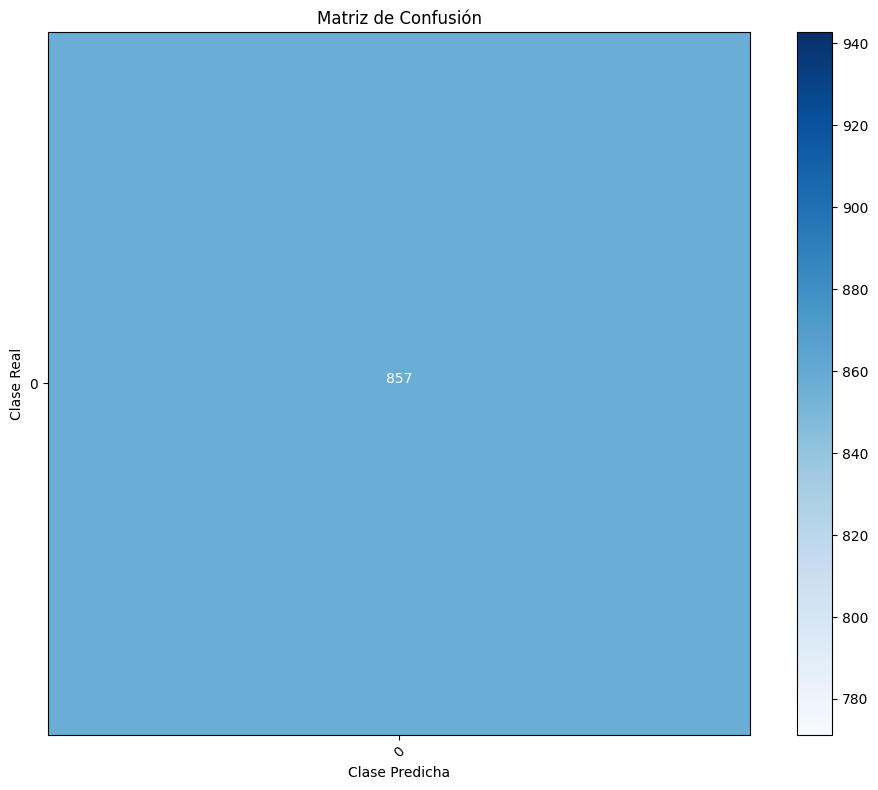

In [27]:
# Graficar la matriz de confusión
# Predecir las clases para el conjunto de entrenamiento
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(df['Porcentaje Au'], y_pred_classes)

# Imprimir el reporte de la matriz de confusión
print(classification_report(df['Porcentaje Au'], y_pred_classes))

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

# Mostrar las etiquetas de las clases
classes = np.unique(df['Porcentaje Au'])
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Mostrar los valores en la matriz
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


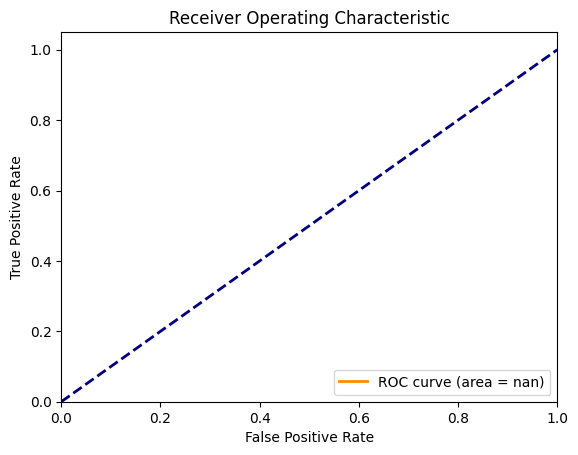

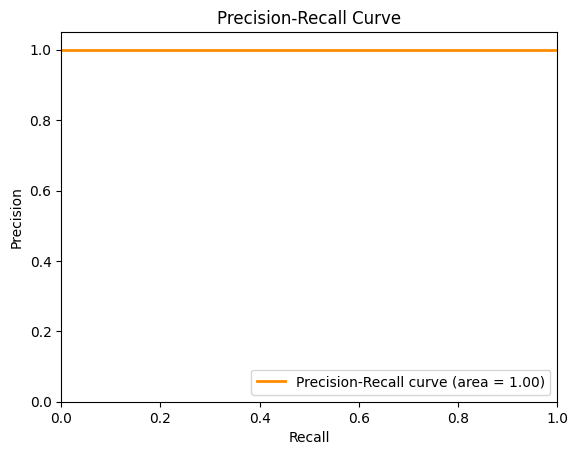

In [ ]:

# Binarize the labels
y_true_binary = (df['Porcentaje Au'] == 0).astype(int)

# Get predicted probabilities for class 0
y_pred_prob = model.predict(X)[:, 0]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_pred_prob)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

F1-score: 1.0


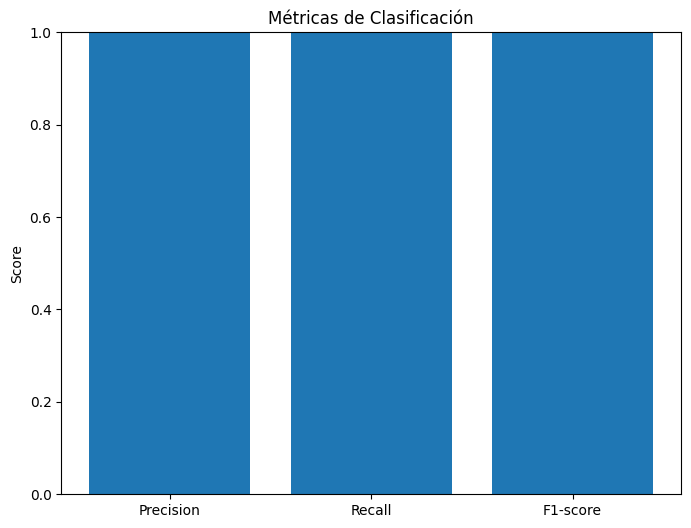

In [ ]:
f1 = f1_score(df['Porcentaje Au'], y_pred_classes, average='weighted')  # Use 'weighted' for multi-class

print(f'F1-score: {f1}')

from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, support = precision_recall_fscore_support(df['Porcentaje Au'], y_pred_classes, average='weighted')

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1])
plt.title('Métricas de Clasificación')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.show()

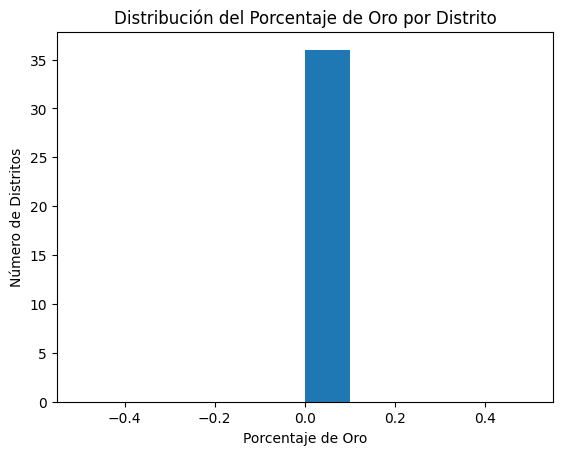

In [ ]:
import matplotlib.pyplot as plt

# Agrupa los datos por distrito y calcula la media del porcentaje de oro
distribucion = df.groupby('ID_SECTOR')['Porcentaje Au'].mean()

# Crea el histograma
plt.hist(distribucion, bins=10)
plt.xlabel('Porcentaje de Oro')
plt.ylabel('Número de Distritos')
plt.title('Distribución del Porcentaje de Oro por Distrito')
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


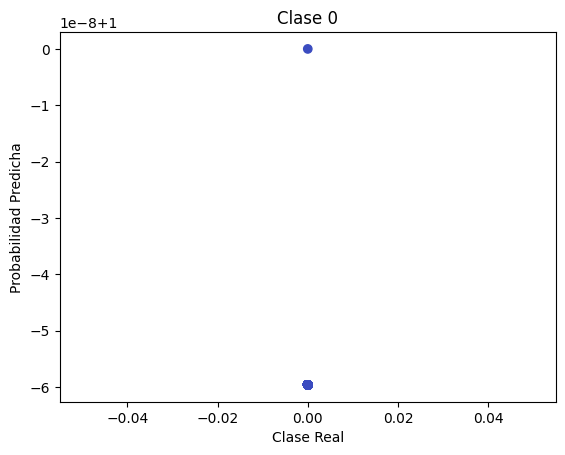

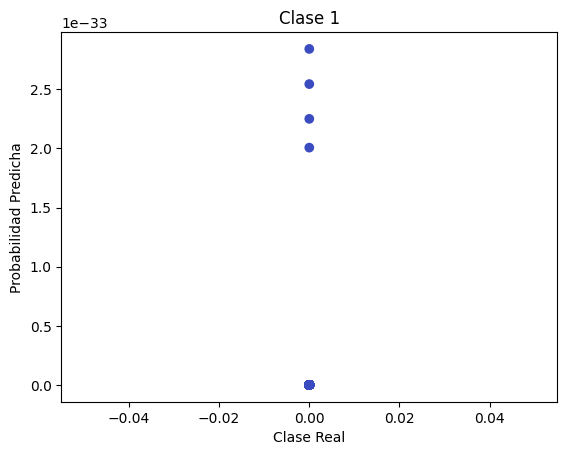

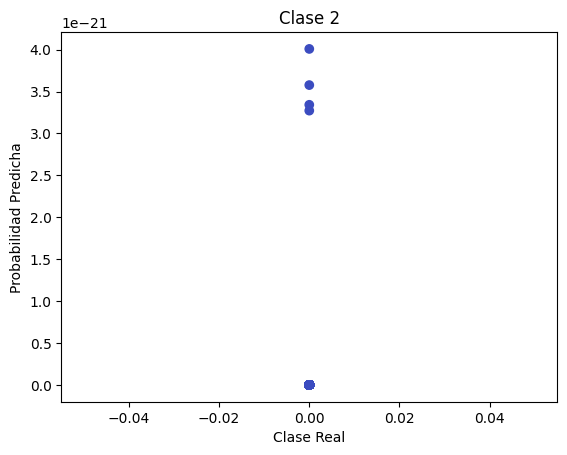

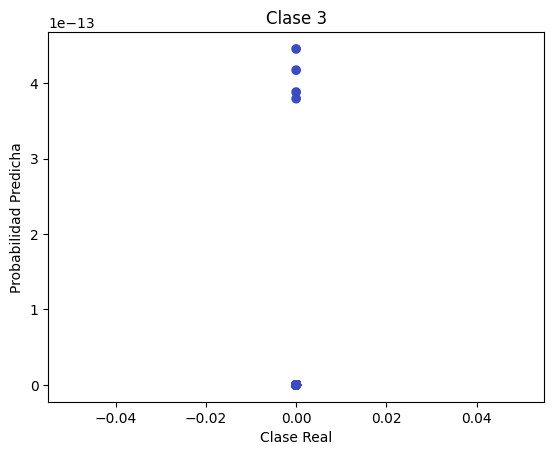

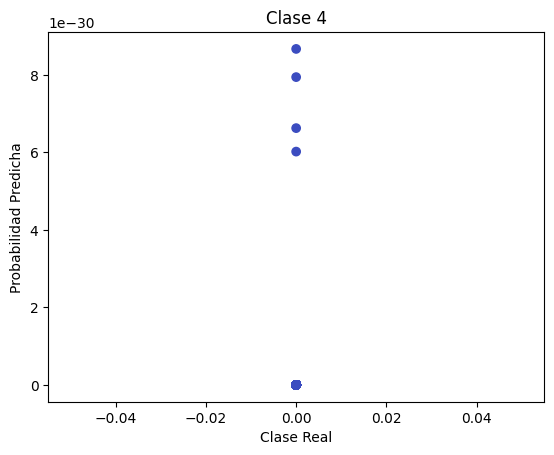

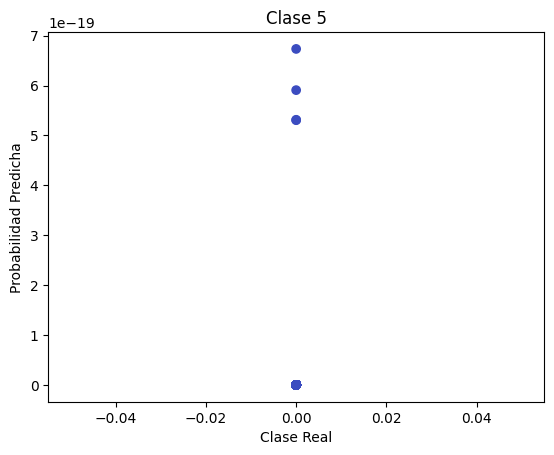

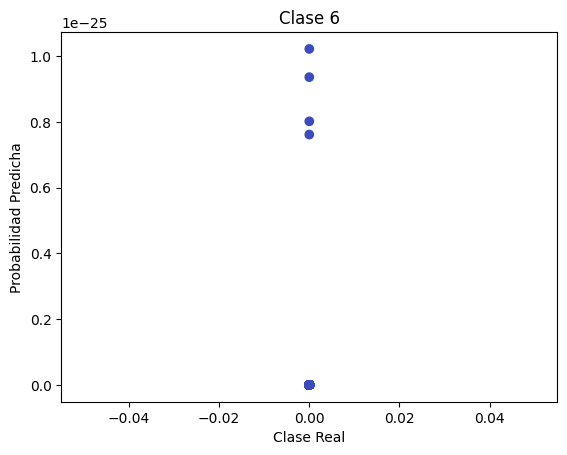

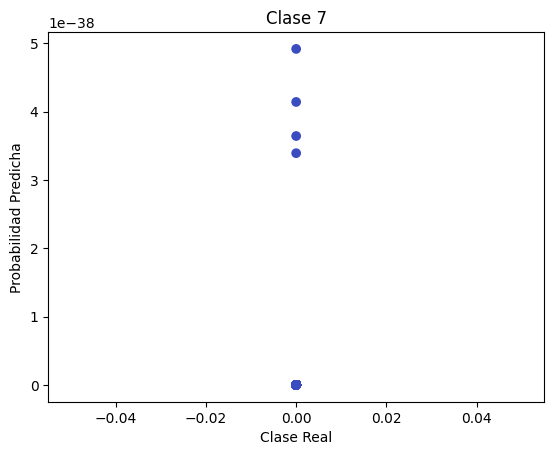

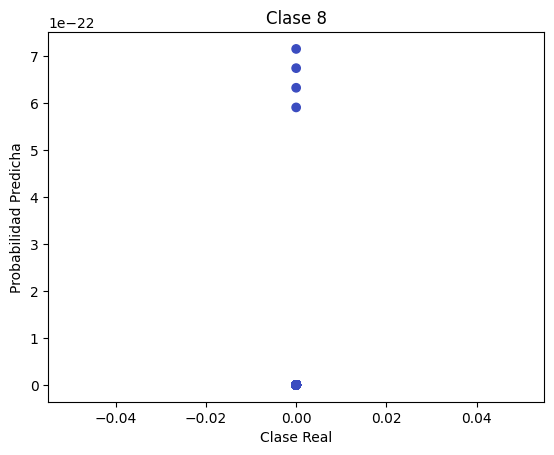

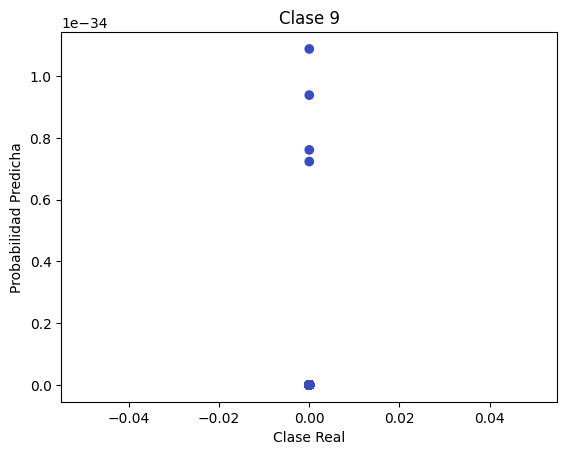

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las probabilidades predichas para cada clase
y_pred_prob = model.predict(X)

# Obtener la clase predicha
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Obtener el número de clases
n_classes = y_pred_prob.shape[1]

# Crear un gráfico de dispersión para cada clase
for i in range(n_classes): # Iterar sobre el número correcto de clases
  plt.figure()
  plt.scatter(df['Porcentaje Au'], y_pred_prob[:, i], c=y_pred_classes==i, cmap='coolwarm')
  plt.xlabel('Clase Real')
  plt.ylabel('Probabilidad Predicha')
  plt.title(f'Clase {i}')
  plt.show()